<a href="https://colab.research.google.com/github/Anderson991288/ML/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import optimizers
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
import os
from keras.callbacks import EarlyStopping
from keras.models import load_model
from keras.utils import np_utils
import matplotlib.pyplot as plt

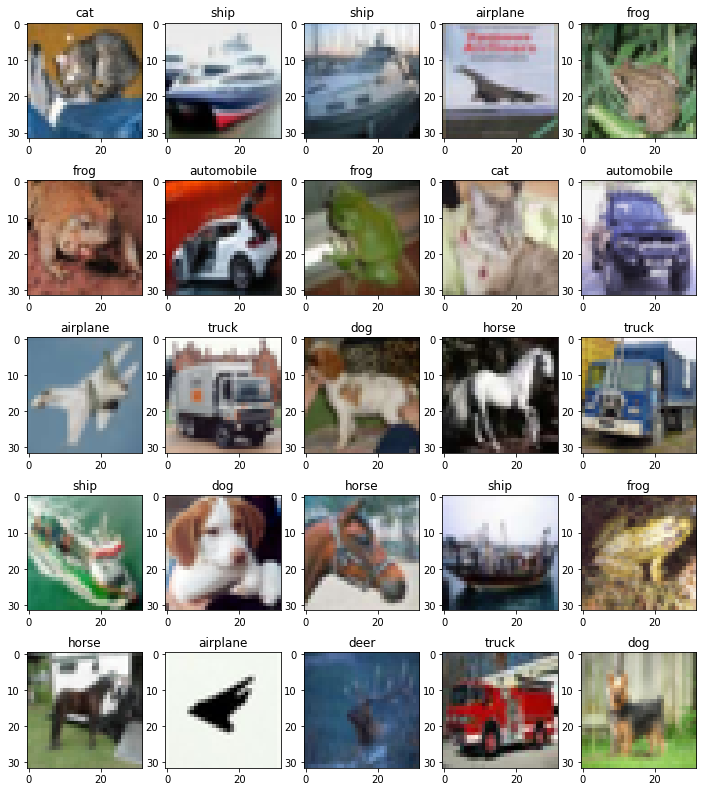

In [3]:

label_dict = {0: "airplane", 1:"automobile", 2:"bird", 3:"cat", 4: "deer", 5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}
fig = plt.gcf()
fig.set_size_inches (12, 14)
for i in range(0, 25):
#pLt.figure (figsize=(5,5))
  plt.subplot(5, 5, 1+i)
  plt.imshow(x_test[i], cmap='binary')
  plt.title(label_dict[y_test[i][0]])

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
batch_size = 10000
num_classes = 10
epochs = 2
data_augmentation = True
#建檔
save_dir = os.path.join(os.getcwd(), 'saved models')
model_name = 'keras cifar10 trained model.h5'
#切成訓練資符和河試資料：
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples ')
# Convert class vectors to binary cLass matrices.
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)
#建立CNN網路，9叠
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',data_format=None,input_shape = x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D (pool_size=(2,2), strides=None, padding='valid'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='valid'))
model.add(Dropout (0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
# initiate RNSprop optimizer
opt = optimizers.RMSprop(lr=0.0001, decay=1e-6)
#用RMSprop訓缭续型
model.compile(loss='categorical_crossentropy',
        optimizer=opt,
        metrics=['accuracy'])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
  print('Not using data augmentation.')
  model.fit(x_train, y_train,
      batch_size=batch_size,
      epochs=epochs,
      validation_data=(x_test, y_test),
      shuffle=True)
else:
  print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
featurewise_center=False,
# set input mean to e over the dataset
samplewise_center=False,
# set each sample mean to e
featurewise_std_normalization=False,
# divide inputs by std of the dataset
samplewise_std_normalization=False,
# divide each input by its std
zca_whitening=False,
# apply ZCA whitening
rotation_range=0,
# randomly rotate images in the range (degrees, a to 180)
width_shift_range=0.2,
# randomly shift images horizontally (fraction of total width)
height_shift_range=0.2,
# randomLy shift images vertically (fraction of total height)
horizontal_flip=True,
# randomly fLip images
vertical_flip=False)
# randomly flip images
# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if CA whitening is applied).
datagen.fit(x_train)
# Fit the model on the batches generated by datagen.fLow().
train_history = model.fit_generator(datagen.flow(x_train, y_train,
                    batch_size=batch_size),
                  epochs=epochs,
                  validation_data=(x_test, y_test),
                  workers=4)
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path =os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s' % model_path)
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples 


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Using real-time data augmentation.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/2
5/5 [==============================] - 559s 107s/step - loss: 2.2955 - accuracy: 0.1098 - val_loss: 2.2792 - val_accuracy: 0.1075
Epoch 2/2
5/5 [==============================] - 545s 105s/step - loss: 2.2704 - accuracy: 0.1378 - val_loss: 2.2427 - val_accuracy: 0.1190
Saved trained model at /content/saved models/keras cifar10 trained model.h5
313/313 [==============================] - 24s 76ms/step - loss: 2.2427 - accuracy: 0.1190
Test loss: 2.242664337158203
Test accuracy: 0.11900000274181366
